<a href="https://colab.research.google.com/github/choisangh/STUDY/blob/main/DL/CNN/model02_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="logo.png"><br>
ref : https://www.kaggle.com/search?q=cat+dog+in%3Acompetitions <br>
ref : https://www.kaggle.com/c/dog-vs-cat-classification

# InceptionV3

<img src="https://cloud.google.com/tpu/docs/images/inceptionv3onc--oview.png?hl=ko">

# weight.h5 파일 받아오기

In [ ]:
# import urllib.request
# url = 'https://address'
# filename = 'myfile.txt'
# urllib.request.urlretrieve(url, filename)

In [ ]:
# ! pip install wget

In [ ]:
import wget 
url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5" 
save_name= './dataset/inception_v3_weights.h5'
wget.download(url, out=save_name)


100% [........................................................................] 87910968 / 87910968

'./dataset/inception_v3_weights.h5'

In [ ]:
# !wget --no-check-certificate \
#   https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#   -O ./dataset/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Weights File Load

In [ ]:
import os
from keras import layers
from keras import Model
from keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,    #-----상단 FC 포함여부
                                weights=None)         #----- None(랜덤) or imagenet

#----------------- 가중치 파일 로드 -----------------------
pre_trained_model.load_weights(save_name)

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

ImportError: Could not find the DLL(s) 'msvcp140_1.dll'. TensorFlow requires that these DLLs be installed in a directory that is named in your %PATH% environment variable. You may install these DLLs by downloading "Microsoft C++ Redistributable for Visual Studio 2015, 2017 and 2019" for your platform from this URL: https://support.microsoft.com/help/2977003/the-latest-supported-visual-c-downloads

## 사전 훈련된 신경망 모델의 마지막 층 임의 지정

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


## 모델 컴파일

In [ ]:
from tensorflow.keras.optimizers import RMSprop

FC = layers.Flatten()(last_output)
FC  = layers.Dense(1024, activation='relu')(FC)
FC  = layers.Dense(1, activation='sigmoid')(FC)

model = Model(pre_trained_model.input, FC)
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

# Data Load

In [ ]:
# !wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O ./dataset/cats_and_dogs_filtered.zip

In [ ]:
import wget 
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip" 
save_name= './dataset/cats_and_dogs_filtered.zip'
wget.download(url, out=save_name)

100% [........................................................................] 68606236 / 68606236

'./dataset/cats_and_dogs_filtered.zip'

In [ ]:
import os
import zipfile

zip_ref = zipfile.ZipFile(save_name, 'r')
zip_ref.extractall('./dataset')   #압축해제
zip_ref.close()

## view dataframe
* train 폴더안에 cat.jpg, dog.jpg 같이 있을 경우

In [ ]:
import pandas as pd
# filenames = os.listdir('./dataset/cats_and_dogs_filtered/train/')
# categories = []
# for filename in filenames:
#     category = filename.split('.')[0]
#     if category == 'dog':
#         categories.append(str(1))
#     else:
#         categories.append(str(0))

# df = pd.DataFrame({
#     'filename': filenames,
#     'category': categories
# })

# df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.101.jpg,0


* 파일을 디렉토리별로 분리

In [ ]:
root_dir = './dataset2/cats-v-dogs'
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)
os.makedirs(root_dir + '/training')
os.makedirs(root_dir + '/testing')
os.makedirs(root_dir + '/training/cats')
os.makedirs(root_dir + '/training/dogs')
os.makedirs(root_dir + '/testing/cats')
os.makedirs(root_dir + '/testing/dogs')

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

./dataset2/cats-v-dogs\testing
./dataset2/cats-v-dogs\training
./dataset2/cats-v-dogs\testing\cats
./dataset2/cats-v-dogs\testing\dogs
./dataset2/cats-v-dogs\training\cats
./dataset2/cats-v-dogs\training\dogs


* train 폴더안에 cat, dog 하위폴더  >  cat.jpg 있을 경우

In [ ]:
import pandas as pd

dir_list = [os.listdir('./dataset/cats_and_dogs_filtered/train/cats'), os.listdir('./dataset/cats_and_dogs_filtered/train/dogs')]

cate_list = []
file_list = []
for filenames in dir_list:      
    for filename in filenames:
        file_list.append(filename)
        category = filename.split('.')[0]
        if category == 'dog':
            cate_list.append(str(1))
        else:
            cate_list.append(str(0))
df = pd.DataFrame({
    'filename': file_list,
    'category': cate_list
})
df.category.value_counts()


0    1000
1    1000
Name: category, dtype: int64

# 데이터 폴더별로 일부 샘플링

In [ ]:
# # Define paths
# TRAINING_SOURCE_DIR = "./dataset/cats_and_dogs_filtered/train/"
# TRAINING_CATS_DIR   = "./dataset2/cats-v-dogs/training/cats/"
# TESTING_CATS_DIR    = "./dataset2/cats-v-dogs/testing/cats/"

# TEST_SOURCE_DIR     = "./dataset/cats_and_dogs_filtered/test/"
# TRAINING_DOGS_DIR   = "./dataset2/cats-v-dogs/training/dogs/"
# TESTING_DOGS_DIR    = "./dataset2/cats-v-dogs/testing/dogs/"

# TRAINING_DIR = "./dataset2/cats-v-dogs/training/"
# TESTING_DIR  = "./dataset2/cats-v-dogs/testing/"

# # split_data
# def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
#     files = []
#     for filename in os.listdir(SOURCE):
#         file = SOURCE + filename
#         if os.path.getsize(file) > 0:
#             files.append(filename)
#         else:
#             print(filename + " is zero length, so ignoring.")

#     training_length = int(len(files) * SPLIT_SIZE)
#     testing_length = int(len(files) - training_length)
#     shuffled_set = random.sample(files, len(files))
#     training_set = shuffled_set[0:training_length]
#     testing_set = shuffled_set[-testing_length:]

#     for filename in training_set:
#         this_file = SOURCE + filename
#         destination = TRAINING + filename
#         copyfile(this_file, destination)

#     for filename in testing_set:
#         this_file = SOURCE + filename
#         destination = TESTING + filename
#         copyfile(this_file, destination)
#     pass


# # Empty directories in case you run this cell multiple times
# if len(os.listdir(TRAINING_CATS_DIR)) > 0:
#     for file in os.scandir(TRAINING_CATS_DIR):
#         os.remove(file.path)
# if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
#     for file in os.scandir(TRAINING_DOGS_DIR):
#         os.remove(file.path)
# if len(os.listdir(TESTING_CATS_DIR)) > 0:
#     for file in os.scandir(TESTING_CATS_DIR):
#         os.remove(file.path)
# if len(os.listdir(TESTING_DOGS_DIR)) > 0:
#     for file in os.scandir(TESTING_DOGS_DIR):
#         os.remove(file.path)

# # Define proportion of images for cats/dogs AS SHOWN BEFORE
# split_size = .5

# # Run the function
# # NOTE: Messages about zero length images should be printed out
# split_data(TRAINING_SOURCE_DIR, TRAINING_CATS_DIR, TRAINING_DOGS_DIR, split_size)
# split_data(TEST_SOURCE_DIR, TESTING_CATS_DIR, TESTING_DOGS_DIR, split_size)

# # Check that the number of images matches the expected output
# print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
# print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
# print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
# print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")

# Data Argumentation
* 압축푼 폴더 내부 폴더명 변경
<pre>
   validaion --> val* 압축푼 폴더 내부 폴더명 변경
   validaion --> val

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_dir = './dataset/cats_and_dogs_filtered'

train_dir  = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

val_dir    = os.path.join(base_dir, 'val')
val_cats_dir   = os.path.join(val_dir, 'cats')
val_dogs_dir   = os.path.join(val_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)


# --------- train 데이터 증강  --------------------
train_generator = ImageDataGenerator(rescale=1./255.,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

# --------- 주의 ::: test 데이터 증강 금지 --------------------
test_datagen = ImageDataGenerator(rescale=1./255.)



# Flow training images in batches of 20 using train_generator generator
train_generator = train_generator.flow_from_directory(train_dir,
                                                      batch_size=20,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

# Flow validation images in batches of 20 using test_datagen generator
val_generator = test_datagen.flow_from_directory(val_dir,
                                                      batch_size=20,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 학습
* ref : https://keras.io/api/models/model_training_apis/

In [ ]:
res = model.fit(
    x=train_generator,
    #y=y_train,
    #---------------------------------------------------------------  
    epochs=20,
    #---------------------------------------------------------------  
    # batch_size=20,  
    steps_per_epoch = 100,   # ==== train(2000) / batch_size(20)
    #===============================================================
    #validation_split=0.2,
    validation_data=val_generator,
    #---------------------------------------------------------------  
    # validation_batch_size=20,
    validation_steps=50,     # ==== val(1000 ) / batch_size(20)
    #---------------------------------------------------------------  
    verbose=2
)

Epoch 1/20
100/100 - 73s - loss: 0.3328 - accuracy: 0.8660 - val_loss: 0.1626 - val_accuracy: 0.9430 - 73s/epoch - 727ms/step
Epoch 2/20
100/100 - 49s - loss: 0.2172 - accuracy: 0.9125 - val_loss: 0.1260 - val_accuracy: 0.9510 - 49s/epoch - 489ms/step
Epoch 3/20
100/100 - 50s - loss: 0.1994 - accuracy: 0.9240 - val_loss: 0.1044 - val_accuracy: 0.9610 - 50s/epoch - 500ms/step
Epoch 4/20
100/100 - 51s - loss: 0.1632 - accuracy: 0.9395 - val_loss: 0.1498 - val_accuracy: 0.9570 - 51s/epoch - 512ms/step
Epoch 5/20
100/100 - 52s - loss: 0.1515 - accuracy: 0.9410 - val_loss: 0.1361 - val_accuracy: 0.9590 - 52s/epoch - 521ms/step
Epoch 6/20
100/100 - 54s - loss: 0.1711 - accuracy: 0.9435 - val_loss: 0.1073 - val_accuracy: 0.9650 - 54s/epoch - 540ms/step
Epoch 7/20
100/100 - 54s - loss: 0.1708 - accuracy: 0.9455 - val_loss: 0.1322 - val_accuracy: 0.9580 - 54s/epoch - 542ms/step
Epoch 8/20
100/100 - 53s - loss: 0.1597 - accuracy: 0.9365 - val_loss: 0.1012 - val_accuracy: 0.9700 - 53s/epoch - 528

# 훈련 시각화

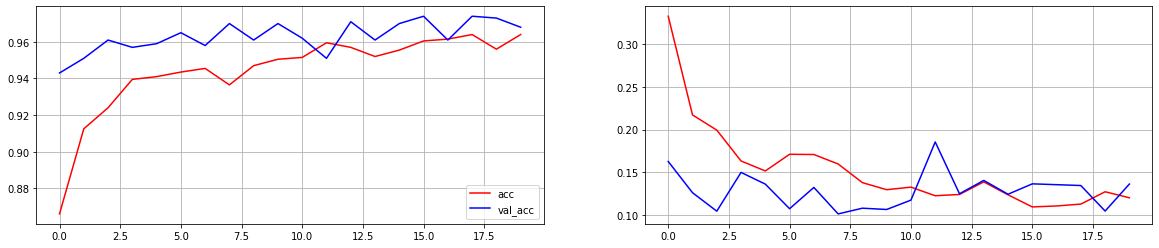

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(res.history['accuracy']))

p, axes = plt.subplots(1,2, figsize=(20,4))
axes[0].plot(epochs, res.history['accuracy'],     'r', label='acc')
axes[0].plot(epochs, res.history['val_accuracy'], 'b', label='val_acc')
axes[0].legend()
axes[0].grid()

axes[1].plot(epochs, res.history['loss'],         'r', label='acc')
axes[1].plot(epochs, res.history['val_loss'],     'b', label='val_acc')
axes[1].grid()

plt.show()

# 모델 저장

In [ ]:
model.save('my_inceptionv3.h5')

In [ ]:
model.save_weights('my_inceptionv3_wieght.h5')

# 모델 불러오기

In [ ]:
from keras.models import load_model

loaded_model = load_model('my_inceptionv3.h5')
loaded_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                            

# predict

In [ ]:
# val_generator = test_datagen.flow_from_directory(val_dir,
#                                                       batch_size=20,
#                                                       class_mode='binary',
#                                                       

val_generator.reset()
pred= model.predict_generator(val_generator, verbose=1)
print(pred[:5])
pred=[1 if x >= 0.5 else 0 for x in pred]

class_dict = (val_generator.class_indices)          #{'cats': 0, 'dogs': 1}

labels = dict((v,k) for k,v in class_dict.items())  # {0: 'cats', 1: 'dogs'}
print(labels)

pred_label=[labels[k] for k in pred]
print(pred_label[:5])

C:\Users\pc\AppData\Local\Temp/ipykernel_10824/301741874.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred= model.predict_generator(val_generator, verbose=1)


50/50 [==============================] - 9s 174ms/step
[[1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [8.9307911e-18]
 [4.7384443e-13]]
{0: 'cats', 1: 'dogs'}
['dogs', 'dogs', 'dogs', 'cats', 'cats']
